In [3]:
# Read wide table from one drive
widecsv=read.csv("Fig.4d_FI.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%27< 18 & i%%27 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%27 >= 18 | i%%27 == 0){
    tallcsv[i,3] <- "Two"
  }
#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"Fig.4d_FI_tall.csv", row.names = FALSE)



In [5]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [6]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("Fig.4d_FI_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))

       Treatment   VALUE Trial
1 X01_fls2_Maya2  5917.0   One
2 X01_fls2_Maya2  2653.0   One
3 X01_fls2_Maya2  8644.0   One
4 X01_fls2_Maya2 13641.0   One
5 X01_fls2_Maya2  1908.0   One
6 X01_fls2_Maya2 20139.8   Two


[1] 26 25

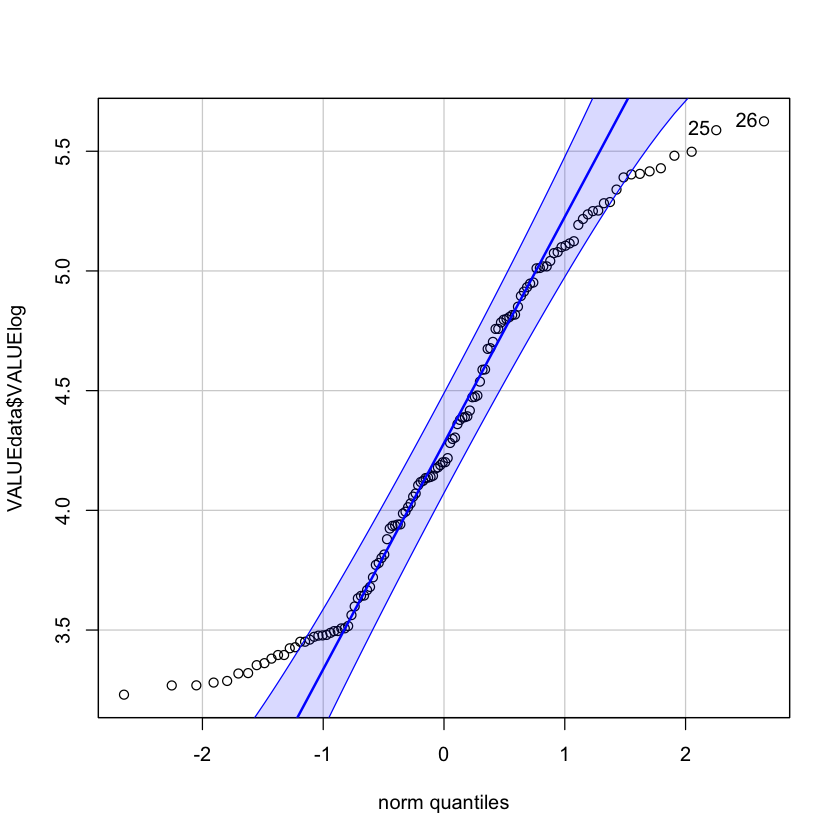

In [8]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


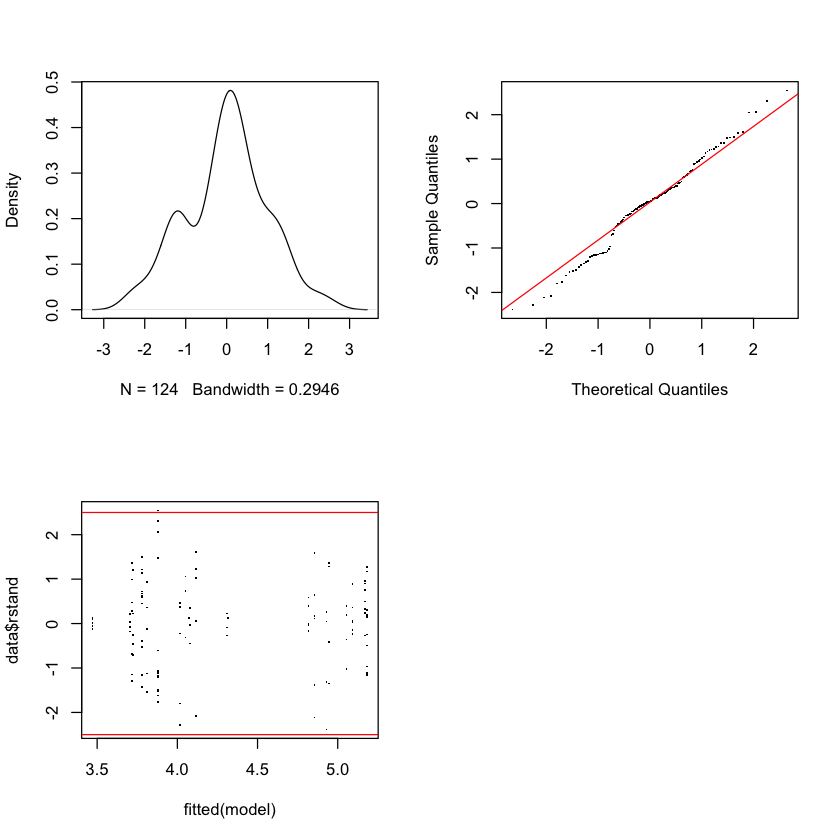

In [9]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [13]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)


Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
   123.7    166.0    -46.8     93.7      109 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.37983 -0.54174  0.05465  0.60488  2.53777 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.01603  0.1266  
 Residual             0.12032  0.3469  
Number of obs: 124, groups:  Trial, 2

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                3.93105    0.15208  11.63780  25.848 1.21e-11 ***
TreatmentX02_WT_DMSO      -0.08964    0.19943 122.51934  -0.449   0.6539    
TreatmentX03_WT_Maya2      1.13351    0.15550 122.72618   7.289 3.33e-11 ***
TreatmentX04_R294A_DMSO   -0.33998    0.18911 122.58795  -1.798   0.0747 .  
TreatmentX05_R294A_Maya2   1.11828    0.16218 122.3506

In [14]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result, alpha=0.1)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF        DenDF          F value     
 Min.   :30.99   Min.   :2.582   Min.   :12   Min.   :122.5   Min.   :21.46  
 1st Qu.:30.99   1st Qu.:2.582   1st Qu.:12   1st Qu.:122.5   1st Qu.:21.46  
 Median :30.99   Median :2.582   Median :12   Median :122.5   Median :21.46  
 Mean   :30.99   Mean   :2.582   Mean   :12   Mean   :122.5   Mean   :21.46  
 3rd Qu.:30.99   3rd Qu.:2.582   3rd Qu.:12   3rd Qu.:122.5   3rd Qu.:21.46  
 Max.   :30.99   Max.   :2.582   Max.   :12   Max.   :122.5   Max.   :21.46  
     Pr(>F)        
 Min.   :1.04e-24  
 1st Qu.:1.04e-24  
 Median :1.04e-24  
 Mean   :1.04e-24  
 3rd Qu.:1.04e-24  
 Max.   :1.04e-24  


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


 X01_fls2_Maya2     X02_WT_DMSO    X03_WT_Maya2  X04_R294A_DMSO X05_R294A_Maya2 
            "a"             "a"             "b"             "a"             "b" 
 X06_R440A_DMSO X07_R440A_Maya2  X08_R533A_DMSO X09_R533A_Maya2  X10_R605A_DMSO 
            "a"             "b"             "a"             "b"             "a" 
X11_R605A_Maya2  X12_Y629A_DMSO X13_Y629A_Maya2 
            "a"             "a"             "a" 


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUElog ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypotheses:
                                        Estimate Std. Error z value Pr(>|z|)
X02_WT_DMSO - X01_fls2_Maya2 == 0      -0.089638   0.199432  -0.449   1.0000
X03_WT_Maya2 - X01_fls2_Maya2 == 0      1.133512   0.155505   7.289    <0.01
X04_R294A_DMSO - X01_fls2_Maya2 == 0   -0.339985   0.189109  -1.798   0.8391
X05_R294A_Maya2 - X01_fls2_Maya2 == 0   1.118276   0.162183   6.895    <0.01
X06_R440A_DMSO - X01_fls2_Maya2 == 0   -0.096343   0.181376  -0.531   1.0000
X07_R440A_Maya2 - X01_fls2_Maya2 == 0   1.042912   0.158561   6.577    <0.01
X08_R533A_DMSO - X01_fls2_Maya2 == 0    0.261146   0.213984   1.220   0.9910
X09_R533A_Maya2 - X01_fls2_Maya2 == 0   1.004895   0.164546   6.107    <0.01
X10_R605A_DMSO - X01_fls2_Maya2 == 0   -0.105877   0.213984  -0.495   1.0000
X11_R605A_Maya2